In [3]:
from helper import *

In [4]:
data = pd.read_csv("data.csv")
print(data.shape)

(5572, 7480)


In [5]:
print(data.columns)

Index(['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence',
       'text_clean', 'y', '00', '000', '000pes',
       ...
       'ìï', 'ó_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò',
       'ûówell'],
      dtype='object', length=7480)


In [6]:
y = data["y"]
X = data.drop(columns=['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence', 'text_clean' ,'y'])
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572, 7473) (5572,)
(4457, 7473) (4457,)
(1115, 7473) (1115,)


In [7]:
def make_model(
                name,
                regularization,
                solver,
                C
            ):
    model = LogisticRegression(
        penalty=regularization,
        solver=solver,
        C=C,
        max_iter=1000,
        random_state=42,
        verbose=1
    )
    return model

param_grid = {
    'regularization' : ["l2"],
    'solver': ['lbfgs'],
    'C' : [10e-3,10e-2,10e-1,0.5,10e0,10e1,10e2,10e3,10e4,10e5,10e6,10e7]
}

def train_f(model:LogisticRegression,X_train,y):
    model = model.fit(X_train,y)
    history = []
    return model , history 

r = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 12


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model0
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.01, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [149,   1]], dtype=int64), 'classification_report': {'0': {'precision': 0.8662477558348295, 'recall'

In [8]:
from pprint import pprint

r.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r])

[({'C': 100000.0, 'name': 'Model8', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 1000000.0, 'name': 'Model9', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 10000000.0,
   'name': 'Model10',
   'regularization': 'l2',
   'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 100000000.0,
   'name': 'Model11',
   'regularization': 'l2',
   'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 1000.0, 'name': 'Model6', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.97847533632287),
 ({'C': 10000.0, 'name': 'Model7', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.97847533632287),
 ({'C': 10.0, 'name': 'Model4', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9730941704035875),
 ({'C': 100.0, 'name': 'Model5', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9730941704035875),
 ({'C': 1.0, 'name': 'Model2', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9488789237668162),
 ({'C': 0.5, 'name': 'Model3', 'regularization': 'l2', 'solver': 'lbfg

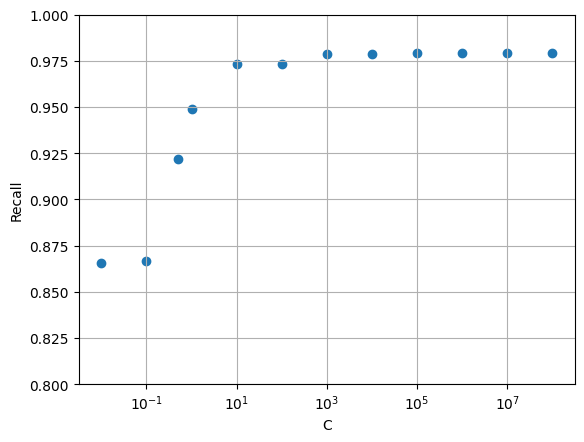

In [9]:
import matplotlib.pyplot as plt
points = [(param["C"], metrics["classification_report"]["accuracy"]) for _ , param , metrics in r]
plt.scatter(*zip(*points))
plt.xscale('log')
plt.xlabel('C')
plt.ylim([0.8,1])
plt.ylabel('Recall')
plt.grid()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

def make_model(
        name,
        max_depth,
        n_estimators,
        max_features,
    ):
    model = RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1,
    )
    return model

param_grid = {
    'max_depth' : [5,10,15],
    'n_estimators' : [10,20,30],
    'max_features' : [1,2,3]
}

r2 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 27
Model: Model0
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 1, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model1
Parameters: {'max_depth': 10, 'n_estimators': 10, 'max_features': 1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model2
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 1, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 're

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model3
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 1, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model4
Parameters: {'max_depth': 10, 'n_estimators': 20, 'max_features': 1, 'name': 'Model4'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'rec

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model5
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 1, 'name': 'Model5'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model6
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 1, 'name': 'Model6'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'rec

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model7
Parameters: {'max_depth': 10, 'n_estimators': 30, 'max_features': 1, 'name': 'Model7'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model8
Parameters: {'max_depth': 15, 'n_estimators': 30, 'max_features': 1, 'name': 'Model8'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 're

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model9
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 2, 'name': 'Model9'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model10
Parameters: {'max_depth': 10, 'n_estimators': 10, 'max_features': 2, 'name': 'Model10'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'r

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model11
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 2, 'name': 'Model11'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model12
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 2, 'name': 'Model12'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model13
Parameters: {'max_depth': 10, 'n_estimators': 20, 'max_features': 2, 'name': 'Model13'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model14
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 2, 'name': 'Model14'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372,

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model15
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 2, 'name': 'Model15'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model16
Parameters: {'max_depth': 10, 'n_estimators': 30, 'max_features': 2, 'name': 'Model16'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model17
Parameters: {'max_depth': 15, 'n_estimators': 30, 'max_features': 2, 'name': 'Model17'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372,

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model18
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 3, 'name': 'Model18'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model19
Parameters: {'max_depth': 10, 'n_estimators': 10, 'max_features': 3, 'name': 'Model19'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model20
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 3, 'name': 'Model20'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model21
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 3, 'name': 'Model21'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model22
Parameters: {'max_depth': 10, 'n_estimators': 20, 'max_features': 3, 'name': 'Model22'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model23
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 3, 'name': 'Model23'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372,

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model24
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 3, 'name': 'Model24'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model25
Parameters: {'max_depth': 10, 'n_estimators': 30, 'max_features': 3, 'name': 'Model25'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [11]:
from pprint import pprint

r2.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r2])

[({'max_depth': 5, 'max_features': 1, 'n_estimators': 10, 'name': 'Model0'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 10, 'name': 'Model1'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 10, 'name': 'Model2'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 1, 'n_estimators': 20, 'name': 'Model3'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 20, 'name': 'Model4'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 20, 'name': 'Model5'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 1, 'n_estimators': 30, 'name': 'Model6'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 30, 'name': 'Model7'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 30, 'name': 'Model8'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 2, 'n_estimators': 10, 'name': 'Model9'},
  0.8654708520179

In [12]:
from sklearn.ensemble import AdaBoostClassifier

def make_model(
        name,
        n_estimators,
    ):
    model = AdaBoostClassifier(
        n_estimators=10
    )
    return model

param_grid = {
    'n_estimators' : [10,20,30,50,100],
}

r3 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Grid size: 5
Model: Model0
Parameters: {'n_estimators': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model1
Parameters: {'n_estimators': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model2
Parameters: {'n_estimators': 30, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model3
Parameters: {'n_estimators': 50, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model4
Parameters: {'n_estimators': 100, 'name': 'Model4'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


In [13]:
from pprint import pprint

r3.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r3])

[({'n_estimators': 10, 'name': 'Model0'}, 0.9363228699551569),
 ({'n_estimators': 20, 'name': 'Model1'}, 0.9363228699551569),
 ({'n_estimators': 30, 'name': 'Model2'}, 0.9363228699551569),
 ({'n_estimators': 50, 'name': 'Model3'}, 0.9363228699551569),
 ({'n_estimators': 100, 'name': 'Model4'}, 0.9363228699551569)]


In [14]:
from sklearn.tree import DecisionTreeClassifier

def make_model(
        name,
        max_depth,
    ):
    model = DecisionTreeClassifier(
        max_depth=max_depth
    )
    return model

param_grid = {
    'max_depth' : [10,20,30,50],
}

r4 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 4
Model: Model0
Parameters: {'max_depth': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[962,   3],
       [ 43, 107]], dtype=int64), 'classification_report': {'0': {'precision': 0.9572139303482587, 'recall': 0.9968911917098445, 'f1-score': 0.9766497461928934, 'support': 965.0}, '1': {'precision': 0.9727272727272728, 'recall': 0.7133333333333334, 'f1-score': 0.823076923076923, 'support': 150.0}, 'accuracy': 0.9587443946188341, 'macro avg': {'precision': 0.9649706015377657, 'recall': 0.855112262521589, 'f1-score': 0.8998633346349082, 'support': 1115.0}, 'weighted avg': {'precision': 0.9593009270808616, 'recall': 0.9587443946188341, 'f1-score': 0.9559897251459019, 'support': 1115.0}}, 'roc_auc': 0.855112262521589, 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.71333333, 1.        ]), 'history': []}
Model: Model1
Parameters: {'max_depth': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[962,   3],
       [ 27, 123]], dtyp

In [15]:
from pprint import pprint

r4.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r4])

[({'max_depth': 20, 'name': 'Model1'}, 0.9730941704035875),
 ({'max_depth': 30, 'name': 'Model2'}, 0.9721973094170404),
 ({'max_depth': 50, 'name': 'Model3'}, 0.968609865470852),
 ({'max_depth': 10, 'name': 'Model0'}, 0.9587443946188341)]


In [17]:
from sklearn.svm import SVC

def make_model(
        name,
        C,
        gamma
    ):
    model = SVC(
        C=C,
        gamma=gamma
    )
    return model

param_grid = {
    'C' : [0.1,0.5,1,10,100],
    'gamma' : [3]
}

r5 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 5


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model0
Parameters: {'C': 0.1, 'gamma': 3, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'C': 0.5, 'gamma': 3, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [128,  22]], dtype=int64), 'classification_report': {'0': {'precision': 0.8828911253430924, 'recall': 1.0, 'f1-score': 0.9378036929057337, 'support': 965.0}, '1': 

In [18]:
from pprint import pprint

r5.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r5])

[({'C': 10, 'gamma': 3, 'name': 'Model3'}, 0.9309417040358744),
 ({'C': 100, 'gamma': 3, 'name': 'Model4'}, 0.9309417040358744),
 ({'C': 1, 'gamma': 3, 'name': 'Model2'}, 0.9273542600896861),
 ({'C': 0.5, 'gamma': 3, 'name': 'Model1'}, 0.885201793721973),
 ({'C': 0.1, 'gamma': 3, 'name': 'Model0'}, 0.8654708520179372)]


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
def make_model(
        name,
        reg_param,
    ):
    model = QuadraticDiscriminantAnalysis(
        reg_param=reg_param
    )
    return model

param_grid = {
    'reg_param' : [0,0.1,0.5,1],
}

r6 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 4


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Model: Model0
Parameters: {'reg_param': 0, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[484, 481],
       [  1, 149]], dtype=int64), 'classification_report': {'0': {'precision': 0.9979381443298969, 'recall': 0.5015544041450777, 'f1-score': 0.6675862068965517, 'support': 965.0}, '1': {'precision': 0.2365079365079365, 'recall': 0.9933333333333333, 'f1-score': 0.382051282051282, 'support': 150.0}, 'accuracy': 0.567713004484305, 'macro avg': {'precision': 0.6172230404189167, 'recall': 0.7474438687392055, 'f1-score': 0.5248187444739169, 'support': 1115.0}, 'weighted avg': {'precision': 0.8955035872238036, 'recall': 0.567713004484305, 'f1-score': 0.6291734367379952, 'support': 1115.0}}, 'roc_auc': 0.7474438687392054, 'fpr': array([0.       , 0.4984456, 1.       ]), 'tpr': array([0.        , 0.99333333, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMe

Model: Model1
Parameters: {'reg_param': 0.1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMe

Model: Model2
Parameters: {'reg_param': 0.5, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Model: Model3
Parameters: {'reg_param': 1, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [20]:
from pprint import pprint

r6.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r6])

[({'name': 'Model1', 'reg_param': 0.1}, 0.8654708520179372),
 ({'name': 'Model2', 'reg_param': 0.5}, 0.8654708520179372),
 ({'name': 'Model3', 'reg_param': 1}, 0.8654708520179372),
 ({'name': 'Model0', 'reg_param': 0}, 0.567713004484305)]


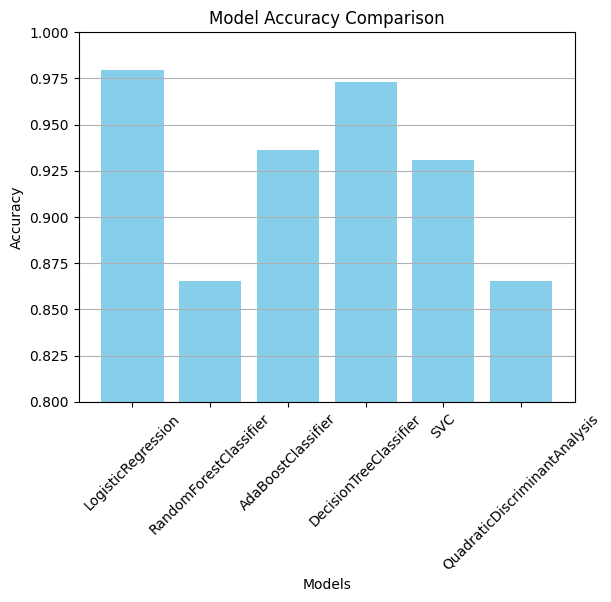

In [32]:
best_models = [
    r[0],
    r2[0],
    r3[0],
    r4[0],
    r5[0],
    r6[0],
]

import matplotlib.pyplot as plt

# Example data
models = [ str(type(m).__name__) for m , _ , _ in best_models]
accuracies = [ m["classification_report"]["accuracy"] for _ , _ , m in best_models]

plt.bar(models,accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0.8, 1])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

